# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Kartikrast/social-infra-prediction-model

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_excel(r'C:\Users\hp\OneDrive\Documents\Code Playground\Prash Project\excel_files\samarqand_student_data 1.xlsx')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,id,Region name,District name,School name,Elementary (Grades 1-4),Enter the year the building was constructed,"If completed, enter the year",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),"Number of shifts (1, 2, or 3)",Between grades 1-4,Between grades 5-9,Between grades 10-11,Available vacant land area on the school premises for the construction of an additional academic building,"Number of academic buildings (do not include branch campuses, if any)",Number of floors:,Enter the type of wall material:,Condition of the building walls,Building foundations,Condition of the concrete slabs (ceiling) between floors,Enter the type of roofing material of the building,Condition of the building roof,Condition of windows and frames in classrooms,Condition of the floors in classrooms,Condition of the doors in classrooms,Is the condition of the library satisfactory?,Condition of the gymnasium,Condition of the stadium,"Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)",Condition of the assembly hall,Condition of the kitchen,Availability of drinking water and handwashing facilities in the kitchen,Condition of electricity supply throughout the day,Is there a generator in the school?,Are there solar panels in the school (above 10 kW),Condition of the internal electrical system,Condition of the lighting system,Source of the heating system,Fuel source for local or improvised heating systems,Condition of the school boiler room,Condition of the internal heating system (pipes and radiators),Availability of water in the school,Source of drinking water supply,Are there concrete/asphalt pathways between buildings and outdoor restrooms?,Is the school perimeter fenced with a boundary wall?,Type of internet connection,Internet usage,Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems,Availability of video surveillance cameras,Availability of public transport stops nearby,Facilities for students with musculoskeletal disorders:,Does the school have a branch?,Have any repair or reconstruction works been carried out in the building?,Total,Boys,Girls,Uzbek,Karakalpak,Russian,Tajik,Kazakh,Kyrgyz,Turkmen,Do you consider the building safe during an earthquake?,Number of floors:.1,Enter the type of wall material of the building:,Condition of the building walls.1,Building foundations.1,Condition of the concrete slabs (ceiling) between floors.1,Do you consider the building safe during an earthquake?.1,Enter the type of roofing material of the building:,Condition of the building roof.1,Condition of windows and frames in classrooms.1,Condition of the floors in classrooms.1,Condition of the doors in classrooms.1,Number of floors:.2,Enter the type of wall material of the building:.1,Condition of the building walls.2,Building foundations.2,Condition of the concrete slabs (ceiling) between floors.2,Do you consider the building safe during an earthquake?.2,Enter the type of roofing material of the building.1,Condition of the building roof.2,Condition of windows and frames in classrooms.2,Condition of the floors in classrooms.2,Condition of the doors in classrooms.2,Where is the functioning restroom located in the school?,Condition of water supply inside the restrooms,Is the restroom connected to the central sewage system?,Total.1,Men,Women,Availability of doors and partitions in restroom stalls,Availability of water and soap for handwashing near restrooms,Do you think the restroom is safe for children?,Do you think there is a connection between the condition of restrooms and students' willingness to attend school?,Are there any issues connecting the indoor restrooms to the sewage system?,Are there any issues connecting the indoor restrooms to the water supply system?,"Are there lights inside the restrooms, and are they safe for children?",Is the p

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(1261, 109)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Columns: 109 entries, id to What is the condition of the adapted (community-built, sponsored, stone, wood, or adobe) restroom?
dtypes: float64(16), int64(13), object(80)
memory usage: 1.0+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    1261
Name: count, dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

# columns where all the values are missing
null_counts = df.isnull().sum()
columns_with_1261_nulls = null_counts[null_counts == 1261]
columns_with_1261_nulls

# We will directly drop these columns
df = df.drop(columns_with_1261_nulls.index, axis=1)

# columns where the null values are greater than 1000
null_counts = df.isnull().sum()
columns_with_1000_nulls = null_counts[null_counts > 1000]
columns_with_1000_nulls

"""
Russian                                                                                               1164
Tajik                                                                                                 1235
Enter the type of wall material of the building:.1                                                    1137
Condition of the building walls.2                                                                     1137
Do you consider the building safe during an earthquake?.2                                             1137
Enter the type of roofing material of the building.1                                                  1137
Condition of the building roof.2                                                                      1137
Condition of windows and frames in classrooms.2                                                       1137
Condition of the floors in classrooms.2                                                               1137
Condition of the doors in classrooms.2                                                                1137
What is the condition of the adapted (community-built, sponsored, stone, wood, or adobe) restroom?    1147
dtype: int64
"""
# We can see that most of these columns are getting repeated, so we will drop them right away
df = df.drop(columns_with_1000_nulls.index, axis=1)

df.isnull().sum()

# columns where the null values are greater than 100
null_counts = df.isnull().sum()
columns_with_100_nulls = null_counts[null_counts > 100]
columns_with_100_nulls

"""
If completed, enter the year                                       406
Enter the type of wall material of the building:                   688
Condition of the building walls.1                                  688
Do you consider the building safe during an earthquake?.1          689
Enter the type of roofing material of the building:                690
Condition of the building roof.1                                   691
Condition of windows and frames in classrooms.1                    691
Condition of the floors in classrooms.1                            691
Condition of the doors in classrooms.1                             691
What is the condition of the standard (project-based) restroom?    179
dtype: int64
"""
# Here also, we can see that most of these columns are getting repeated, so we will drop them right away but we will only drop the columns that are getting repeated
repeated_columns = ['Condition of the building walls.1', 'Do you consider the building safe during an earthquake?.1', 'Condition of the building roof.1', 'Condition of windows and frames in classrooms.1', 'Condition of the floors in classrooms.1', 'Condition of the doors in classrooms.1']
df = df.drop(repeated_columns, axis=1)

# The rest of the missing values we will handle later


In [9]:
# Shape of the data after removing null values
df.shape

(1261, 79)

### What did you know about your dataset?

Our dataset had 1261 rows and 109 columns.
Data types of the columns are as follows:-
- float64(16), 
- int64(13), 
- object(80)

There were no fully duplicated rows found in the dataset.
However there were many repeated columns in the dataset, where there was 100% null values. Hence, these columns were dropped.
There were many other columns with more than 1000 null values. Hence, these columns were dropped, because most of them were repeated and the others were not useful.
Few more columns were there with more than 100 null values and repeated columns. Hence, these columns were dropped.
Rest of the null values will be handled accordingly as we move forward in the analysis.

After this pocess the shape of the dataset is as follows:
(1261, 79)


## ***2. Understanding Your Variables***

### Dataset Bifurcation

In [5]:
# Dataset Columns
df.columns

# Dividing the dataset into 3 parts: Population Columns, Infrastructure Columns, and Resources columns
common_columns = ['id', 'Region name', 'District name', 'School name']

# Population Columns
population_columns = common_columns + ['Elementary (Grades 1-4)', 
                        'Number of shifts (1, 2, or 3)',
                        'Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport)',
                        'Between grades 1-4',
                        'Between grades 5-9', 
                        'Between grades 10-11',
                        'Total', 
                        'Boys', 
                        'Girls',
                        'Total.1',
                        'Men', 
                        'Women'
                        ]
# Infrastructure Columns
infrastructure_columns = common_columns + ['Enter the year the building was constructed',
                            'If completed, enter the year',
                            'Available vacant land area on the school premises for the construction of an additional academic building',
                            'Number of academic buildings (do not include branch campuses, if any)',
                            'Enter the type of wall material:',
                            'Condition of the building walls',
                            'Enter the type of roofing material of the building',
                            'Condition of the building roof',
                            'Condition of windows and frames in classrooms',
                            'Condition of the floors in classrooms',
                            'Condition of the doors in classrooms',
                            'Is the condition of the library satisfactory?',
                            'Condition of the gymnasium', 
                            'Condition of the stadium',
                            'Condition of the assembly hall',
                            'Condition of the kitchen',
                            'Condition of the internal electrical system',
                            'Condition of the lighting system',
                            'Condition of the school boiler room',
                            'Condition of the internal heating system (pipes and radiators)',
                            'Condition of water supply inside the restrooms',
                            'Is the restroom connected to the central sewage system?',
                            'Are there any issues connecting the indoor restrooms to the sewage system?',
                            'Are there any issues connecting the indoor restrooms to the water supply system?',
                            'Are there lights inside the restrooms, and are they safe for children?',
                            'Are there concrete/asphalt pathways between buildings and outdoor restrooms?',
                            'Conditions for dining',
                            'Is the school perimeter fenced with a boundary wall?',
                            'Have any repair or reconstruction works been carried out in the building?',
                            'Do you consider the building safe during an earthquake?',
                            '(QUESTION MAINLY FOR RURAL SCHOOLS) Are children in your microdistrict forced to walk more than 3 km one way to reach the school?',
                            'Do you think your school\'s infrastructure meets modern educational requirements?',
                            'Are you satisfied with the condition of your school?',
                            'What material are the walls of the outdoor restroom made of?',
                            'What is the condition of the outdoor restroom?',
                            'What is the condition of the standard (project-based) restroom?',
                            ]

# Resources Columns
resources_columns = common_columns + ['Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)',
                            'Availability of drinking water and handwashing facilities in the kitchen',
                            'Is there a generator in the school?',
                            'Are there solar panels in the school (above 10 kW)',
                            'Source of the heating system',
                            'Fuel source for local or improvised heating systems',
                            'Availability of water in the school',
                            'Source of drinking water supply',
                            'Type of internet connection', 
                            'Internet usage',
                            'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems',
                            'Availability of video surveillance cameras',
                            'Availability of public transport stops nearby',
                            'Facilities for students with musculoskeletal disorders:',
                            'Where is the functioning restroom located in the school?',
                            'Availability of doors and partitions in restroom stalls',
                            'Availability of water and soap for handwashing near restrooms',
                            'Do you think the restroom is safe for children?',
                            'Do you think there is a connection between the condition of restrooms and students\' willingness to attend school?',
                            'Do you think the classrooms are warm during the autumn-winter season?',
                            'Does the school building have a water pipeline, and does water flow through it?',
                            ]

In [34]:
# Creating the 3 different dfs as per the analysis
population_df = df[population_columns].copy()
infrastructure_df = df[infrastructure_columns].copy()
resources_df = df[resources_columns].copy()

# Displaying the first 5 rows of each df
population_df.head()


,id,Region name,District name,School name,Elementary (Grades 1-4),"Number of shifts (1, 2, or 3)",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),Between grades 1-4,Between grades 5-9,Between grades 10-11,Total,Boys,Girls,Total.1,Men,Women
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),2,903,31,31,19,1383,714,669,10.0,5,5
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,350,24,26,21,564,296,268,6.0,3,3
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,530,25,25,25,865,465,400,12.0,6,6
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,440,30,26,20,610,310,300,8.0,4,4
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),2,840,30,30,30,1156,720,436,8.0,4,4


In [7]:
infrastructure_df.head()

,id,Region name,District name,School name,Enter the year the building was constructed,"If completed, enter the year",Available vacant land area on the school premises for the construction of an additional academic building,"Number of academic buildings (do not include branch campuses, if any)",Enter the type of wall material:,Condition of the building walls,Enter the type of roofing material of the building,Condition of the building roof,Condition of windows and frames in classrooms,Condition of the floors in classrooms,Condition of the doors in classrooms,Is the condition of the library satisfactory?,Condition of the gymnasium,Condition of the stadium,Condition of the assembly hall,Condition of the kitchen,Condition of the internal electrical system,Condition of the lighting system,Condition of the school boiler room,Condition of the internal heating system (pipes and radiators),Condition of water supply inside the restrooms,Is the restroom connected to the central sewage system?,Are there any issues connecting the indoor restrooms to the sewage system?,Are there any issues connecting the indoor restrooms to the water supply system?,"Are there lights inside the restrooms, and are they safe for children?",Are there concrete/asphalt pathways between buildings and outdoor restrooms?,Conditions for dining,Is the school perimeter fenced with a boundary wall?,Have any repair or reconstruction works been carried out in the building?,Do you consider the building safe during an earthquake?,(QUESTION MAINLY FOR RURAL SCHOOLS) Are children in your microdistrict forced to walk more than 3 km one way to reach the school?,Do you think your school's infrastructure meets modern educational requirements?,Are you satisfied with the condition of your school?,What material are the walls of the outdoor restroom made of?,What is the condition of the outdoor restroom?,What is the condition of the standard (project-based) restroom?
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,1987,2006.0,10.0,1,brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Partially in need of repair (floors in some cl...,Partially in need of repair (some doors do not...,yes,Partially in need of repair (floor or its cove...,Partially in need of repair (the surface layer...,Partially in need of repair (some seats have d...,"Partially in need of repair (floor and walls, ...",Needs complete replacement (wires are disconne...,Partially modern lighting installed (some LED ...,Operational,Needs repair or replacement (some or all pipes...,"Yes, there is water available only for handwas...",There is a septic tank (special) in the school...,There are no restrooms inside the building,There are no restrooms inside the building,Yes,Available,There is a kitchen available for preparing hot...,Fully fenced,"Yes, current maintenance","Yes, safe",My school is located in the city,yes,I am satisfied,Stone,Standard (constructed based on a design),Repaired - satisfactory
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,2015,2019.0,10.0,2,brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors are intact) – ...,"Satisfactory (almost all doors are present, in...",yes,"Satisfactory (the floor is not rotten, its cov...","Satisfactory (the surface layer is even, with ...",Completely absent,There is no cafeteria at all,"Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern LED lighting instal...,Operational,Operational (all pipes and radiators are in go...,"Yes, there is water available only for handwas...",There is a septic tank (special) in the school...,There are no restrooms inside the building,There are no restrooms inside the building,Yes,Av

In [8]:
resources_df.head()

,id,Region name,District name,School name,"Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)",Availability of drinking water and handwashing facilities in the kitchen,Is there a generator in the school?,Are there solar panels in the school (above 10 kW),Source of the heating system,Fuel source for local or improvised heating systems,Availability of water in the school,Source of drinking water supply,Type of internet connection,Internet usage,Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems,Availability of video surveillance cameras,Availability of public transport stops nearby,Facilities for students with musculoskeletal disorders:,Where is the functioning restroom located in the school?,Availability of doors and partitions in restroom stalls,Availability of water and soap for handwashing near restrooms,Do you think the restroom is safe for children?,Do you think there is a connection between the condition of restrooms and students' willingness to attend school?,Do you think the classrooms are warm during the autumn-winter season?,"Does the school building have a water pipeline, and does water flow through it?"
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,Almost everything is available,Completely absent,Not available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Not available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,Available,Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,Available,"Water is available, but there is no soap","Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the

In [9]:
# Dataset Describe
population_df.describe()

,id,"Number of shifts (1, 2, or 3)",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),Between grades 1-4,Between grades 5-9,Between grades 10-11,Total,Boys,Girls,Total.1,Men,Women
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1260.000000,1261.000000,1261.000000
mean,631.000000,1.824742,509.976209,24.615385,24.425852,22.348136,618.233941,310.740682,307.493259,9.078571,4.615385,4.610626
std,364.163654,0.386548,368.433009,6.063190,5.812706,7.106568,444.788443,230.215676,220.917257,4.782416,2.818091,2.424056
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,32.000000,14.000000,18.000000,0.000000,0.000000,0.000000
25%,316.000000,2.000000,260.000000,20.000000,21.000000,20.000000,326.000000,160.000000,162.000000,6.000000,3.000000,3.000000
50%,631.000000,2.000000,420.000000,25.000000,25.000000,23.000000,503.000000,251.000000,253.000000,8.000000,4.000000,4.000000
75%,946.000000,2.000000,640.000000,30.000000,29.000000,28.000000,778.000000,396.000000,387.000000,10.000000,5.000000,5.000000
max,1261.000000,3.000000,2040.000000,40.000000,40.000000,40.000000,4897.000000,2560.000000,2337.000000,64.000000,58.000000,32.000000


In [10]:
infrastructure_df.describe()

,id,Enter the year the building was constructed,"If completed, enter the year",Available vacant land area on the school premises for the construction of an additional academic building,"Number of academic buildings (do not include branch campuses, if any)"
count,1261.000000,1261.000000,855.000000,1261.000000,1261.000000
mean,631.000000,1996.011102,2007.142690,40.252419,1.589215
std,364.163654,18.721684,134.894297,258.000907,0.737442
min,1.000000,1907.000000,0.000000,0.000000,1.000000
25%,316.000000,1984.000000,2012.000000,5.000000,1.000000
50%,631.000000,2005.000000,2019.000000,10.000000,1.000000
75%,946.000000,2009.000000,2021.500000,25.000000,2.000000
max,1261.000000,2024.000000,2024.000000,6566.000000,5.000000


In [11]:
resources_df.describe()

,id
count,1261.000000
mean,631.000000
std,364.163654
min,1.000000
25%,316.000000
50%,631.000000
75%,946.000000
max,1261.000000


### Variables Description

In the above steps we have bifurcated the dataset into 3 different dataframes: population_df, infrastructure_df, and resources_df.
Each of these dfs have their own related columns, on which we will be performing analysis. The idea to bifurcate the dataset is to make the analysis more focused and easier to understand. 

Using this bifurcation we will simplfy the current position of each school in terms of capacity, infrastructure and resources. Once these positions are framed we can then use them as scores for each school in order to identify the level of development needed for each school.

### Working on each df separately

#### 1. Population df

In [15]:
population_df.head()

,ID,region_name,district_name,school_name,elementary,total_students,boys,girls,total_staff,men,women,total_capacity
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),1383,714,669,10.0,5,5,1806
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),564,296,268,6.0,3,3,700
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),865,465,400,12.0,6,6,1060
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),610,310,300,8.0,4,4,880
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),1156,720,436,8.0,4,4,1680


In [35]:
# Renaming columns for simplicity
population_df.rename(columns={
    'id': 'ID',
    'Region name': 'region_name',
    'District name': 'district_name',
    'School name': 'school_name',
    'Number of shifts (1, 2, or 3)': 'number_of_shifts',
    'Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport)': 'total_design_capacity',
    'Elementary (Grades 1-4)': 'elementary',
    'Between grades 1-4': 'between_grades_1_4',
    'Between grades 5-9': 'between_grades_5_9',
    'Between grades 10-11': 'between_grades_10_11',
    'Total': 'total_students',
    'Boys': 'boys',
    'Girls': 'girls',
    'Total.1': 'total_staff',
    'Men': 'men',
    'Women': 'women'
}, inplace=True)

# Displaying the first few rows of the DataFrame
population_df.head()


,ID,region_name,district_name,school_name,elementary,number_of_shifts,total_design_capacity,between_grades_1_4,between_grades_5_9,between_grades_10_11,total_students,boys,girls,total_staff,men,women
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),2,903,31,31,19,1383,714,669,10.0,5,5
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,350,24,26,21,564,296,268,6.0,3,3
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,530,25,25,25,865,465,400,12.0,6,6
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,440,30,26,20,610,310,300,8.0,4,4
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),2,840,30,30,30,1156,720,436,8.0,4,4


In [36]:
# Creating a column for total capacity as per shifts
population_df['total_capacity'] = population_df['total_design_capacity'] * population_df['number_of_shifts']

# Filtering the df only with required columns
population_df = population_df[['ID', 'region_name', 'district_name', 'school_name', 'elementary','total_students', 'boys', 'girls', 'total_staff', 'men', 'women', 'total_capacity']]

# Displaying the first few rows of the DataFrame
population_df.head()

,ID,region_name,district_name,school_name,elementary,total_students,boys,girls,total_staff,men,women,total_capacity
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),1383,714,669,10.0,5,5,1806
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),564,296,268,6.0,3,3,700
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),865,465,400,12.0,6,6,1060
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),610,310,300,8.0,4,4,880
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),1156,720,436,8.0,4,4,1680


In [38]:
# creating a column to check the difference of total_students and total_capacity
population_df['difference'] = population_df['total_capacity'] - population_df['total_students']
population_df['difference'].describe()

count    1261.000000
mean      310.011895
std       525.602518
min     -1640.000000
25%        80.000000
50%       191.000000
75%       383.000000
max      3941.000000
Name: difference, dtype: float64

In [39]:
Q1 = population_df['difference'].quantile(0.25)
Q3 = population_df['difference'].quantile(0.75)
IQR = Q3 - Q1

population_df = population_df[(population_df['difference'] >= Q1 - 1.5 * IQR) & (population_df['difference'] <= Q3 + 1.5 * IQR)]

# creating a usage % column to check the usage of the total capacity
population_df['usage %'] = round((population_df['total_students'] / population_df['total_capacity'])*100, 2)

In [43]:
population_df.describe()

# We can see that few values in the total capacity column are 0 which is not possible hence we will drop the values where the capacity is less than 100
population_df = population_df[population_df['total_capacity'] > 100]

# Displaying the description of the DataFrame
population_df.describe()


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ID,total_students,boys,girls,total_staff,men,women,total_capacity,difference,usage %
count,1178.000000,1178.000000,1178.000000,1178.000000,1177.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,619.280136,593.624788,298.780985,294.843803,8.953271,4.559423,4.551783,820.240238,226.615450,73.321808
std,361.359064,403.447832,209.952828,197.121135,4.461707,2.714438,2.269696,502.352793,200.403664,19.289842
min,1.000000,51.000000,24.000000,21.000000,0.000000,0.000000,0.000000,120.000000,-308.000000,22.080000
25%,306.250000,322.250000,159.000000,160.250000,6.000000,3.000000,3.000000,460.000000,80.000000,60.560000
50%,612.500000,496.500000,248.000000,246.500000,8.000000,4.000000,4.000000,720.000000,179.000000,71.425000
75%,927.500000,739.500000,379.000000,369.000000,10.000000,5.000000,5.000000,1080.000000,344.500000,84.722500
max,1261.000000,3297.000000,1845.000000,1453.000000,58.000000,58.000000,29.000000,3648.000000,832.000000,238.890000


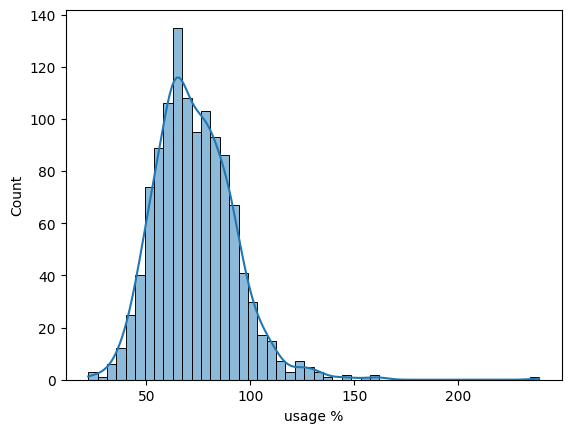

In [45]:
# visualizing the usage %
sns.histplot(data=population_df['usage %'], kde=True)
plt.show()

# We can see that the usage % is normally distributed but there are values where the usage is more than 100% making the school overcrowded 
# On the other hand there are values where the usage is less than 50% making the school underutilized

In [48]:
# Now in the final step we will assign a z-score as per the usage % of the school
# Calculate Z-score for 'usage %'
population_df["z_score"] = zscore(population_df["usage %"])

# Define categories based on Z-score
def categorize_usage(z):
    if z > 2:
        return "RED (Overcrowded)"
    elif z < -1:
        return "GREEN (Underutilized)"
    else:
        return "YELLOW (Optimal)"

population_df["Need_Category"] = population_df["z_score"].apply(categorize_usage)

# Display summary
population_df = population_df[['ID', 'region_name', 'district_name', 'school_name', 'usage %', 'z_score', 'Need_Category']]
population_df.head()


,ID,region_name,district_name,school_name,usage %,z_score,Need_Category
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,76.58,0.168979,YELLOW (Optimal)
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,80.57,0.375911,YELLOW (Optimal)
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,81.60,0.429330,YELLOW (Optimal)
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,69.32,-0.207545,YELLOW (Optimal)
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,68.81,-0.233995,YELLOW (Optimal)


### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***